# Network-anomaly detection on a smart grid-network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


### Project Objectives
This project is to build a **Machine Learning Model** to predict Network-anomaly detection on a smart grid-network.
The traget variable..........

### Table of Content
1. [Data importation](#1.Data-gathering-and-cleaning)

2. [Exploratory data analysis, data cleaning, and Feature engineering](#2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering)

3. [Data preprocessing for modelling](#3.Data-preprocessing-for-modelling)

4. [Building different Classification models](#4.Building-of-Models)

5. [Model Evaluation](#5.Model-Evaluation-and-Comparison)

6. [Model selection](#6.Implementing-the-best-Best-model-with-test-data)





## Importing the needed packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [4]:
# Importing the needed classes for building models,validation, and metrics.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Binary Data1

## 1.Data-gathering-and-cleaning

#### About the data

In [5]:
data1 = pd.read_csv('/content/drive/MyDrive/Network-Anomalies-Detection-on-the-Smart-Grid-Network/BINARY/data3.csv')

In [6]:
data1.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,-175.216223,477.18466,64.486400,130431.1505,0.0,0.0,0.0,0.0,62.801904,488.72059,121.484241,18.49411,-109.578178,17.39545,59.984,0.01,8.534604,-0.022814,0,56.725162,128393.9844,-63.223571,128248.2891,176.745311,128467.9766,-122.593686,487.083435,112.705996,515.613525,-1.870422,482.070923,56.747134,128370.8672,0.0,0.0,0.0,0.0,-123.994448,494.493469,-66.717226,18.379211,67.634582,17.847061,59.980000,0.0,8.328605,3.113633,0,56.728551,127923.8235,-63.243081,127873.6770,176.774668,127923.8235,-122.802044,485.42461,112.557559,513.44044,-2.223076,481.02997,56.751470,127898.7503,0.0,0.0,0.0,0.0,-124.222980,492.93212,-65.729718,17.94478,66.354242,17.21234,59.982,0.02,8.296189,3.115981,0,64.537966,130456.2238,-55.450855,129829.3921,-175.456866,130531.4436,64.165543,479.74820,-60.618935,507.76403,-175.307897,474.98734,64.549425,130280.7109,0.0,0.0,0.0,0.0,62.675853,487.07260,121.214951,18.12789,-107.057164,17.21234,59.986,0.01,8.569795,-0.012023,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982442,131459.1546,77.933719,264.04462,-48.013863,282.90495,-161.637124,260.56553,71.012389,131383.9348,0.0,0.0,0.0,0.0,75.997122,268.80548,135.447223,12.45148,-94.709924,11.35282,60.018,0.00,16.023407,-0.147158,0,66.700745,130660.0234,-53.253479,130526.0938,-173.279112,130753.9063,-114.579169,267.637268,119.720771,288.082123,6.138611,264.696106,66.722718,130645.5313,0.0,0.0,0.0,0.0,-116.342478,273.124695,-56.384584,12.405396,75.671085,12.073517,60.018002,0.0,15.833487,-3.139707,0,66.698017,130180.4178,-53.262157,130155.3446,-173.250978,130205.4911,-114.803553,266.42505,119.702343,285.46849,5.872817,262.94596,66.726665,130180.4178,0.0,0.0,0.0,0.0,-116.505238,271.36902,-57.072326,12.08526,75.951285,11.35282,60.018,0.00,15.725281,-3.133479,0,71.081144,131409.0081,-48.930596,130782.1763,-168.925147,131484.2279,77.784750,261.29797,-47.905001,280.70763,-161.551180,258.55132,71.081144,131233.4952,0.0,0.0,0.0,0.0,76.008581,266.60816,135.790997,12.08526,-92.716030,11.53593,60.018,0.00,16.264883,-0.139233,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,-161.276160,272.46768,74.891313,132361.7923,0.0,0.0,0.0,0.0,77.589945,276.12988,130.405194,5.85952,-95.815732,5.12708,60.000,0.00,14.435529,-0.073738,0,70.650329,131673.3906,-49.303895,131531.9063,-169.335034,131753.8438,-114.309998,278.285980,123.197939,286.663055,6.105652,277.507782,70.672302,131650.4219,0.0,0.0,0.0,0.0,-115.013132,280.746460,-58.807068,5.224228,74.435122,5.453110,59.999001,0.0,14.208004,-3.064706,0,70.651426,131183.3486,-49.314477,1

## 2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering

### Inspecting the data 

In [7]:
data1.shape

(5415, 129)

### Checking the data types of the different columns

In [8]:
data1.dtypes

R1-PA1:VH     float64
R1-PM1:V      float64
R1-PA2:VH     float64
R1-PM2:V      float64
R1-PA3:VH     float64
               ...   
snort_log1      int64
snort_log2      int64
snort_log3      int64
snort_log4      int64
marker         object
Length: 129, dtype: object

### Checking for missing values

In [9]:
data1.isnull().sum()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [10]:
data1.isnull().sum().sum()

0

From the explorations above, there are no missing values


### Separating Numerical variables and Categorical variables

In [11]:
categorical_var = data1.select_dtypes(include = 'object') 

numerical_var = data1.select_dtypes(include = np.number) 

In [12]:
# Categorical variables
categorical_var.columns

Index(['marker'], dtype='object')

###  Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.

In [13]:
# Creating a function to explore the categorical variables
def explore_cat(df,x):
    '''
    This function return a sumaary of a categorical variable
    
    '''
    unique_categories = df[x].nunique()
    if unique_categories <=6:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(normalize=True)*100,'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    else:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(y=df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    
    
    
    

#### Exploring  Credit-Application-Result

Summary
count       5415
unique         2
top       Attack
freq        3811
Name: marker, dtype: object 



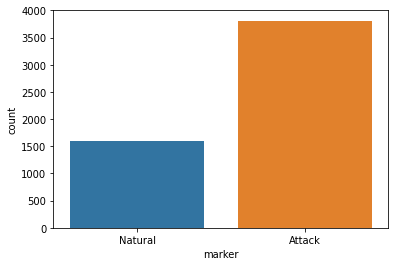

Value counts 

Attack     70.378578
Natural    29.621422
Name: marker, dtype: float64 

Missing values: 0


In [14]:
explore_cat(data1,'marker')

By exploring the marker variable, it is observed that there are two unique categories indicating natural and attack.

Comparatively, there are more Attacks than Naturals in high proportion

This clearly indicates that the data is not balanced.

The exploration also shows that the target variable (marker) has no missing values.

# Exploring the numerical Variables

In [15]:
# Numerical variables

numerical_var.columns

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log',
       'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3',
       'snort_log4'],
      dtype='object', length=128)

In [16]:
numerical_var.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.0,5415.0,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.0,5415.0,5415.000000,5415.0
mean,-23.495637,130763.627199,5.867754,131096.640972,6.991122,131471.471309,-21.632383,402.736530,13.685911,393.328024,6.067199,389.424822,-23.488963,131101.664886,0.449567,347.256686,0.546862,92.051082,-21.692586,393.741146,-5.998086,11.282180,8.609154,9.970449,59.999829,-0.000175,inf,0.026034,2453.161958,-21.700815,126660.994507,21.691429,127898.898784,3.229767,128288.448435,22.181520,402.892297,-16.303084,398.441792,-13.839227,394.599232,-21.658377,127606.413512,0.397808,485.181690,0.235214,515.357979,22.493761,396.309343,8.828947,10.942828,-7.286321,8.965905,60.003044,-0.000497,inf,-2.179054,2396.330194,-21.701872,126489.243553,21.674136,127670.951629,3.224633,128121.738000,22.511284,389.115784,-15.434439,383.745301,-15.308573,378.375697,-21.666227,127417.894500,0.399415,484.138682,0.234736,514.754465,23.173996,381.470476,9.653574,11.011556,-6.794329,9.114313,60.003017,-0.000713,inf,-2.190146,2431.512465,-22.751983,131051.263266,6.076200,131471.932483,7.113745,131856.059659,-20.633561,390.220692,12.218664,379.588483,6.907211,374.608076,-22.769900,131449.196788,0.442333,373.490894,0.438207,114.875808,-21.148357,379.996043,-5.824523,10.915880,8.218920,10.657115,59.997514,0.000068,inf,0.015038,2416.812558,0.0,0.0,0.000185,0.00018

A general inspection of the descriptive statistics above indicates that variables have different scales which may cause models to put more weight on those with high values at the expense of those with low values.

To resolve this, the variables may or may not be scaled depending on the kind of algorithm that is used.

### Calculating correlation among the numerical variables to investigate for multi-colinearity

In [17]:
cor = numerical_var.corr()

In [18]:
cor

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,-0.005014,-0.332566,0.035106,-0.317059,0.021726,0.900743,-0.029915,-0.356566,-0.052990,-0.307413,-0.046485,0.997656,0.010675,-0.069034,0.021591,-0.060229,0.015179,0.907758,-0.046385,0.049367,0.023603,-0.231936,0.016002,-0.002428,-0.012152,0.013573,-0.003752,0.145086,0.827682,-0.020429,-0.405730,-0.006762,-0.279636,-0.001546,-0.463469,-0.034807,0.283175,-0.052326,0.034216,-0.046540,0.832020,-0.011702,-0.062103,0.026784,-0.067934,0.024687,-0.464108,-0.050392,-0.183481,0.026395,0.437722,0.026111,0.014736,0.000508,0.010743,0.031161,0.144641,0.827685,-0.020666,-0.405706,-0.009191,-0.279587,-0.002059,-0.458394,0.041606,0.294150,0.034545,0.035962,0.032187,0.832022,-0.012715,-0.062141,0.026788,-0.067922,0.024697,-0.463032,0.036785,-0.182337,0.019863,0.419178,0.016076,0.014701,-0.004117,-0.024893,-0.024234,0.144225,0.968041,-0.010080,-0.326372,-0.005972,-0.320113,-0.004654,0.887463,0.027409,-0.340387,0.032103,-0.305265,0.029566,0.969383,-0.008566,-0.052497,0.010358,-0.064702,0.012429,0.899161,0.030911,0.036054,0.008036,-0.223174,0.010648,-0.007812,0.001214,0.011604,0.031409,0.144504,NaN,NaN,-0.010845,-0.010845,0.029689,0.018572,-0.037791,-0.014248,NaN,NaN,-0.014843,NaN
R1-PM1:V,-0.005014,1.000000,-0.013431,0.757249,0.017694,0.766801,0.039856,-0.781489,-0.011176,-0.342174,0.009633,-0.369373,0.000567,0.950896,-0.258195,-0.929058,-0.326052,-0.885534,0.019714,-0.499190,-0.015044,-0.876642,-0.000221,-0.887211,-0.081577,-0.031864,0.105432,-0.732220,-0.036555,0.009616,0.615010,-0.015079,0.183505,0.018160,0.038729,0.015198,-0.587157,0.002503,-0.347319,-0.003628,-0.364674,0.004126,0.345765,-0.198544,-0.831303,-0.129066,-0.764910,0.010110,-0.362742,0.032198,-0.831485,0.022947,-0.741299,0.020495,-0.061399,0.205158,-0.068539,-0.035441,0.009605,0.614699,-0.015171,0.183718,0.018159,0.038078,0.052589,-0.339321,0.016919,0.079645,-0.012772,0.035855,0.004116,0.345527,-0.199245,-0.831391,-0.128645,-0.765091,0.015278,-0.012811,0.009088,-0.767407,-0.015592,-0.672923,0.020473,-0.065209,0.098040,-0.116092,-0.037316,-0.011299,0.564934,-0.002012,0.272710,0.003380,0.289883,-0.005115,-0.330890,-0.013330,0.089300,0.017391,0.035635,-0.015759,0.463493,-0.211255,-0.612836,-0.181051,-0.498923,-0.000362,-0.055689,-0.002238,-0.651509,0.008387,-0.538758,-0.034601,-0.079120,0.015966,-0.400634,-0.036288,NaN,NaN,0.005406,0.005406,0.085018,0.008600,-0.203668,-0.224423,NaN,NaN,0.000489,NaN
R1-PA2:VH,-0.332566,-0.013431,1.000000,-0.040203,-0.312448,-0.036122,-0.307588,0.014459,0.830590,0.019609,-0.293478,0.018719,-0.332683,-0.026312,-0.011452,-0.003045,-0.023529,-0.005007,-0.309488,0.018931,-0.212578,0.003769,0.088896,0.001301,0.008365,0.000277,0.018588,-0.010914,0.002731,-0.273787,-0.020807,0.703937,-0.031048,-0.328371,-0.031518,-0.012535,0.007023

In [19]:

mask = np.triu(np.ones_like(cor,dtype=bool))
half_cor_matrix = cor.mask(mask)
half_cor_matrix

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PM1:V,-0.005014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PA2:VH,-0.332566,-0.013431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PM2:V,0.035106,0.757249,-0.040203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PA3:VH,-0.317059,0.017694,-0.312448,-0.009060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Highly correlated variables

In [20]:
# Creating a list comprehension to pick the variable with high variance.

highly_correlated_variables = [i for i in half_cor_matrix.columns if any (half_cor_matrix[i]>0.9) ] 
print(highly_correlated_variables)
print(f'\n There are {len(highly_correlated_variables)} correlated variables')

['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM8:V', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PM11:I', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM11:I', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM5:I', 'R3-PM6:I', 'R3-PM8:V', 'R3-PM9:V', 'R3-PM10:I', 'R3-PM11:I', 'R3:S', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM5:I', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PA8:VH', 'R4-PM8:V', 'R4-PM9:V', 'R4-PM11:I', 'control_panel_log3']

 There are 69 correlated variables


# 3.Data-preprocessing-for-modelling

### Changing the target variable to a dummy variable

In [21]:
data1['marker'] =data1['marker'].replace({'Natural':0,'Attack':1})

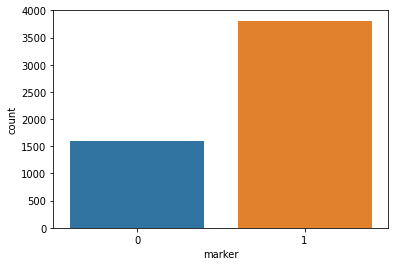

In [22]:

sns.countplot(data1['marker'])
plt.show()

In [23]:
# Dropping variables with infinite values
data1 = data1.drop(['R1-PA:Z','R2-PA:Z','R3-PA:Z','R4-PA:Z'],axis=1)


### Seperating the data into target variable and predictors

In [24]:
# predictors
X = data1.drop('marker',axis = 1)

# Target variable
y = data1['marker']# 

In [25]:
X.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,-175.216223,477.18466,64.486400,130431.1505,0.0,0.0,0.0,0.0,62.801904,488.72059,121.484241,18.49411,-109.578178,17.39545,59.984,0.01,-0.022814,0,56.725162,128393.9844,-63.223571,128248.2891,176.745311,128467.9766,-122.593686,487.083435,112.705996,515.613525,-1.870422,482.070923,56.747134,128370.8672,0.0,0.0,0.0,0.0,-123.994448,494.493469,-66.717226,18.379211,67.634582,17.847061,59.980000,0.0,3.113633,0,56.728551,127923.8235,-63.243081,127873.6770,176.774668,127923.8235,-122.802044,485.42461,112.557559,513.44044,-2.223076,481.02997,56.751470,127898.7503,0.0,0.0,0.0,0.0,-124.222980,492.93212,-65.729718,17.94478,66.354242,17.21234,59.982,0.02,3.115981,0,64.537966,130456.2238,-55.450855,129829.3921,-175.456866,130531.4436,64.165543,479.74820,-60.618935,507.76403,-175.307897,474.98734,64.549425,130280.7109,0.0,0.0,0.0,0.0,62.675853,487.07260,121.214951,18.12789,-107.057164,17.21234,59.986,0.01,-0.012023,0,0,0,0,0,0,0,0,0,0,0,0,0
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982442,131459.1546,77.933719,264.04462,-48.013863,282.90495,-161.637124,260.56553,71.012389,131383.9348,0.0,0.0,0.0,0.0,75.997122,268.80548,135.447223,12.45148,-94.709924,11.35282,60.018,0.00,-0.147158,0,66.700745,130660.0234,-53.253479,130526.0938,-173.279112,130753.9063,-114.579169,267.637268,119.720771,288.082123,6.138611,264.696106,66.722718,130645.5313,0.0,0.0,0.0,0.0,-116.342478,273.124695,-56.384584,12.405396,75.671085,12.073517,60.018002,0.0,-3.139707,0,66.698017,130180.4178,-53.262157,130155.3446,-173.250978,130205.4911,-114.803553,266.42505,119.702343,285.46849,5.872817,262.94596,66.726665,130180.4178,0.0,0.0,0.0,0.0,-116.505238,271.36902,-57.072326,12.08526,75.951285,11.35282,60.018,0.00,-3.133479,0,71.081144,131409.0081,-48.930596,130782.1763,-168.925147,131484.2279,77.784750,261.29797,-47.905001,280.70763,-161.551180,258.55132,71.081144,131233.4952,0.0,0.0,0.0,0.0,76.008581,266.60816,135.790997,12.08526,-92.716030,11.53593,60.018,0.00,-0.139233,0,0,0,0,0,0,0,0,0,0,0,0,0
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,-161.276160,272.46768,74.891313,132361.7923,0.0,0.0,0.0,0.0,77.589945,276.12988,130.405194,5.85952,-95.815732,5.12708,60.000,0.00,-0.073738,0,70.650329,131673.3906,-49.303895,131531.9063,-169.335034,131753.8438,-114.309998,278.285980,123.197939,286.663055,6.105652,277.507782,70.672302,131650.4219,0.0,0.0,0.0,0.0,-115.013132,280.746460,-58.807068,5.224228,74.435122,5.453110,59.999001,0.0,-3.064706,0,70.651426,131183.3486,-49.314477,131158.2754,-169.314758,131233.4952,-114.459779,276.86232,123.174467,284.36983,5.895736,275.39744,70.680074,131183.3486,0.0,0.0,0.0,0.0,-115.141599,278.

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: marker, dtype: int64

### Splitting the data into 70% train set and 30% test set

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 0)

In [28]:
X_train.shape

(3790, 124)

# Feature selection using feature importance

In [29]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.96


In [30]:
Feature_importance=pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})

In [31]:
Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

In [32]:
first_45 = Feature_importance['Features'].values[0:45]

In [33]:
first_45

array(['R4-PM5:I', 'R3-PM5:I', 'R1-PM5:I', 'R4-PM2:V', 'R2-PM5:I',
       'R1-PA3:VH', 'R4-PM7:V', 'R1-PA2:VH', 'R2-PA2:VH', 'R3-PA5:IH',
       'R3-PA2:VH', 'R2-PA7:VH', 'R1-PA1:VH', 'R2-PA3:VH', 'R4-PA3:VH',
       'R1-PA7:VH', 'R3-PA3:VH', 'R3-PM2:V', 'R4-PA7:VH', 'R2-PA5:IH',
       'R4-PA2:VH', 'R2-PA1:VH', 'R3-PA7:VH', 'R4-PM10:I', 'R4-PM1:V',
       'R3-PA1:VH', 'R2-PA4:IH', 'R4-PM4:I', 'R2-PA10:IH', 'R4-PM3:V',
       'R1-PM4:I', 'R3-PM10:I', 'R2-PM7:V', 'R4-PA5:IH', 'R4-PM6:I',
       'R3-PA10:IH', 'R3-PA4:IH', 'R3-PM7:V', 'R2-PM1:V', 'R3-PM6:I',
       'R2-PM10:I', 'R2-PM3:V', 'R1-PM6:I', 'R3-PA6:IH', 'R4-PA1:VH'],
      dtype=object)

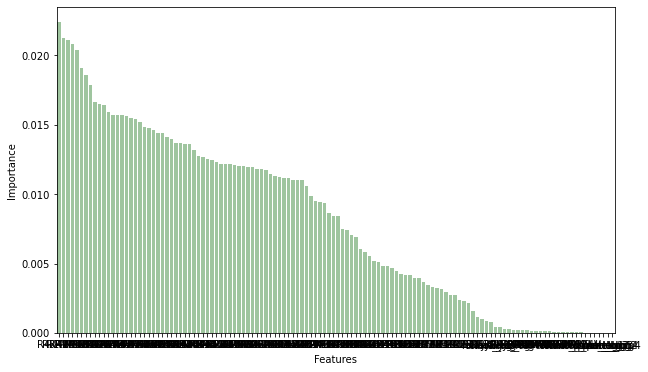

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(y='Importance',x='Features',data = Feature_importance, color = 'g',alpha = 0.4)
plt.show()

In [35]:
# Before dropping unimportant features
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

train score: 0.70
test score: 0.70


In [36]:
#

# Selecting important features for training

In [37]:
X_train = X_train[first_45]
X_test = X_test[first_45]

In [38]:
# After dropping unimportant features
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

train score: 0.70
test score: 0.70


### Checking whether the target variable is balanced or not

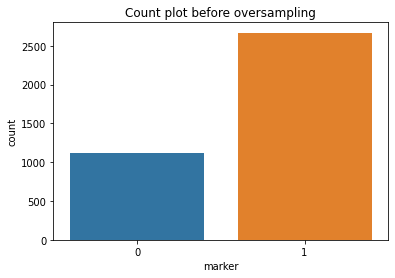

In [39]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

The graph above shows that the classes target variable is not balanced.

This presupposes that accuracy would not a good metric for measuring the performance of models built on this data.
Other metrics need to be employed in this case or the data should be balanced by employing a statiscal technique.

# 4.Building-of-Models

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms.**

## Decision tree as a base model

**Decision tree classifier before hyperparameter tuning**

In [40]:
#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.93


**Hyperparameter tuning for decision tree**

In [41]:
# Hyperparameter tuning using gridsearch and cross validation.

#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200]}
grid_tree = GridSearchCV(tree, param_grid = param_grid,cv =5)
grid_tree.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))
print('Best parameters:',grid_tree.best_params_)


Best cross-validation acuracy: 0.92
Best test score: 0.92
Best parameters: {'max_features': 17, 'max_leaf_nodes': 200}


**Decision tree classifier after hyperparameter tuning**

In [42]:
#Instantiating the model
tree = DecisionTreeClassifier(max_features=17,max_leaf_nodes=200,random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))


train accuracy: 0.99
test accuracy: 0.92


# Logistic Regression

**Logistic Regression before hyperparameter tuning**

In [43]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))


train score: 0.70
test score: 0.70


**Hyperparameter tuning for Logistic Regression**

In [44]:
# Hyperparameter tuning
lr = LogisticRegression()
param_grid = {'C': [1,3,4,5,7,9,10,11,15,17]}
grid_lgr = GridSearchCV(lr, param_grid, cv=5)
grid_lgr.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_lgr.best_score_))
print('Best test score: {:.2f}'.format(grid_lgr.score(X_test,y_test)))
print('Best parameters:',grid_lgr.best_params_)


Best cross-validation acuracy: 0.71
Best test score: 0.70
Best parameters: {'C': 15}


**Logistic Regression after hyperparameter tuning**

In [45]:
# Logistic regression with tuned hyper-parameters

lgr = LogisticRegression(C=15).fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))
lgr_y_pred =lgr.predict(X_test)

train score: 0.70
test score: 0.70


# Support Vector Machine

**Support vector classifier before hyperparameter tuning**

In [46]:
# SVC before Hyper-parameters tuning

Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
#Svc = SVC(probability=True)
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))

train score: 0.74
test score: 0.73


**Hyperparameter tuning for Support vector classifier**

In [47]:
#Hyper-parameter tuning with using pipline and gridsearch

pipe = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
param_grid = {'SVC__C':[0.001,0.01,0.1,1,10,100],
            'SVC__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid,cv =5)
grid.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid.best_score_))
#print('Best train score: {:.2f}'.format(grid.score(X_train,y_train)))
print('Best test score: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best parameters:',grid.best_params_)

Best cross-validation acuracy: 0.95
Best test score: 0.95
Best parameters: {'SVC__C': 100, 'SVC__gamma': 1}


**Support vector classifier after hyperparameter tuning**

In [48]:
# SVC with tuned Hyper-parameters
Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C=100,gamma=1,probability=True))])
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))
Svc_y_pred = Svc_model.predict(X_test)

train score: 1.00
test score: 0.95


# Random Forest

**Random Forest classifier before hyperparameter tuning**

In [49]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))


train score: 1.00
test score: 0.96


**Hyperparameter tuning for Random Forestclassifier**

In [50]:
rfc = RandomForestClassifier(random_state = 0)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200],}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 0.95
Best test score: 0.96
Best parameters: {'max_features': 20, 'max_leaf_nodes': 200}


**Random Forest  classifier after hyperparameter tuning**

In [72]:
rfc = RandomForestClassifier(max_features=10,max_leaf_nodes=200,random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_y_pred = rfc.predict(X_test)

train score: 1.00
test score: 0.96


## Gradient Boosting Classifier

Gradient Boosting Classifier before hyperparameter tuning

In [52]:
gbc = GradientBoostingClassifier(n_estimators=300,random_state=42)
gbc.fit(X_train,y_train)
print('Train accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_train,y_train)))
print('Test accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_test,y_test)))

Train accuracy of GradientBoosting Classifier: 0.983
Test accuracy of GradientBoosting Classifier: 0.929


**Hyperparameter tuning for Gradient Boosting Classifier**

In [53]:
gbc = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200]}
grid_gbc = GridSearchCV(gbc, param_grid = param_grid,cv =5)

grid_gbc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_gbc.best_score_))
print('Best test score: {:.2f}'.format(grid_gbc.score(X_test,y_test)))
print('Best parameters:',grid_gbc.best_params_)

Best cross-validation acuracy: 0.77
Best test score: 0.77
Best parameters: {'max_features': 20, 'max_leaf_nodes': 5}


**Gradient Boosting Classifier after hyperparameter tuning**

In [74]:
gbc = GradientBoostingClassifier(max_depth=3,max_features=20,max_leaf_nodes=5,random_state=42)
gbc.fit(X_train,y_train)
gbc_y_pred =gbc.predict(X_test) 
print('Train accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_train,y_train)))
print('Test accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_test,y_test)))

Train accuracy of GradientBoosting Classifier: 0.859
Test accuracy of GradientBoosting Classifier: 0.837


In [58]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [59]:
from catboost import CatBoostClassifier

In [80]:

cbc = CatBoostClassifier()
# Fit 'catboost' to the training set
cbc.fit(X_train,y_train)
cbc_y_pred = cbc.predict(X_test)
print('Train accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_train,y_train)))
print('Test accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_test,y_test)))


Learning rate set to 0.018198
0:	learn: 0.6875895	total: 34.8ms	remaining: 34.7s
1:	learn: 0.6812298	total: 72.8ms	remaining: 36.3s
2:	learn: 0.6750712	total: 105ms	remaining: 34.8s
3:	learn: 0.6706317	total: 158ms	remaining: 39.3s
4:	learn: 0.6655182	total: 193ms	remaining: 38.5s
5:	learn: 0.6596928	total: 232ms	remaining: 38.5s
6:	learn: 0.6549942	total: 262ms	remaining: 37.1s
7:	learn: 0.6491890	total: 292ms	remaining: 36.2s
8:	learn: 0.6448819	total: 325ms	remaining: 35.8s
9:	learn: 0.6398424	total: 360ms	remaining: 35.6s
10:	learn: 0.6340580	total: 384ms	remaining: 34.6s
11:	learn: 0.6292233	total: 420ms	remaining: 34.6s
12:	learn: 0.6255422	total: 477ms	remaining: 36.2s
13:	learn: 0.6217797	total: 513ms	remaining: 36.2s
14:	learn: 0.6172024	total: 541ms	remaining: 35.5s
15:	learn: 0.6131027	total: 579ms	remaining: 35.6s
16:	learn: 0.6086434	total: 616ms	remaining: 35.6s
17:	learn: 0.6049430	total: 649ms	remaining: 35.4s
18:	learn: 0.6017196	total: 684ms	remaining: 35.3s
19:	learn

# Voting classifier

In [61]:
cbc = CatBoostClassifier()
gbc = GradientBoostingClassifier(n_estimators=300,random_state=42)
rfc = RandomForestClassifier(max_features=10,max_leaf_nodes=200,random_state = 42)
#svc = SVC(probability=True)
svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C=100,gamma=1,probability=True))])

classifiers = [('Catboost', cbc),
('Svc', svc),('Random', rfc),('Gradientboost',gbc)]

In [62]:
vc = VotingClassifier(estimators=classifiers,voting = 'hard')
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train,y_train)
vc_y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier train accuracy: {:.3f} '.format(vc.score(X_train,y_train)))
print('Voting Classifier test accuracy: {:.3f}'.format(accuracy_score(y_test, vc_y_pred)))

Learning rate set to 0.018198
0:	learn: 0.6875895	total: 41.5ms	remaining: 41.4s
1:	learn: 0.6812298	total: 94.4ms	remaining: 47.1s
2:	learn: 0.6750712	total: 143ms	remaining: 47.6s
3:	learn: 0.6706317	total: 197ms	remaining: 49s
4:	learn: 0.6655182	total: 268ms	remaining: 53.3s
5:	learn: 0.6596928	total: 284ms	remaining: 47.1s
6:	learn: 0.6549942	total: 307ms	remaining: 43.5s
7:	learn: 0.6491890	total: 327ms	remaining: 40.6s
8:	learn: 0.6448819	total: 359ms	remaining: 39.5s
9:	learn: 0.6398424	total: 378ms	remaining: 37.4s
10:	learn: 0.6340580	total: 396ms	remaining: 35.6s
11:	learn: 0.6292233	total: 412ms	remaining: 33.9s
12:	learn: 0.6255422	total: 430ms	remaining: 32.6s
13:	learn: 0.6217797	total: 445ms	remaining: 31.4s
14:	learn: 0.6172024	total: 470ms	remaining: 30.9s
15:	learn: 0.6131027	total: 509ms	remaining: 31.3s
16:	learn: 0.6086434	total: 548ms	remaining: 31.7s
17:	learn: 0.6049430	total: 584ms	remaining: 31.9s
18:	learn: 0.6017196	total: 621ms	remaining: 32.1s
19:	learn: 

### ANN

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
# lbfgs
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

ann.fit(X_train, y_train)
ann_y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('MLP train accuracy: {:.3f} '.format(ann.score(X_train,y_train)))
print('MLP test accuracy: {:.3f}'.format(accuracy_score(y_test, ann_y_pred)))

MLP train accuracy: 0.296 
MLP test accuracy: 0.956


# 5.Model-Evaluation-and-Comparison

Different metrics are considered for evaluating and comparing the models.
Since the classes in the target variable (marker) is not balanced, 
accuracy is definetly not a good metric to rely on in this case hence will be used to only check for overfitting and underfitting.
Confusion matrix,F1 score,and Receiver Operation Curve will employed in evaluating and comparing the models.

## Accuracies and F1 scores 

In [75]:
# 1.Decision tree

dct_auc_score = roc_auc_score(y_test,tree_y_pred)
dct_precision_score = precision_score(y_test,tree_y_pred)
dct_recall_score = recall_score(y_test,tree_y_pred)
dct_f1_score = f1_score(y_test,tree_y_pred)


# 2.Logistic regression

lgr_auc_score = roc_auc_score(y_test,lgr_y_pred)
lgr_precision_score = precision_score(y_test,lgr_y_pred)
lgr_recall_score = recall_score(y_test,lgr_y_pred)
lgr_f1_score    =f1_score(y_test,lgr_y_pred)

# 3.Support vector classifier


svc_auc_score = roc_auc_score(y_test,Svc_y_pred)
svc_precision_score = precision_score(y_test,Svc_y_pred)
svc_recall_score = recall_score(y_test,Svc_y_pred)
svc_f1_score=f1_score(y_test,Svc_y_pred)

# 4.Random Forest
rfc_auc_score = roc_auc_score(y_test,rfc_y_pred)
rfc_precision_score = precision_score(y_test,rfc_y_pred)
rfc_recall_score = recall_score(y_test,rfc_y_pred)
rfc_f1_score=f1_score(y_test,rfc_y_pred)

# 5.Gradient Boost Classifier
gbc_auc_score = roc_auc_score(y_test,rfc_y_pred)
gbc_precision_score = precision_score(y_test,rfc_y_pred)
gbc_recall_score = recall_score(y_test,rfc_y_pred)
gbc_f1_score=f1_score(y_test,gbc_y_pred)


# 7.Votting classifier
vc_auc_score = roc_auc_score(y_test,vc_y_pred)
vc_precision_score = precision_score(y_test,vc_y_pred)
vc_recall_score = recall_score(y_test,vc_y_pred)
vc_f1_score=ada_f1_score=f1_score(y_test,vc_y_pred)

# 8. Catboost classifier
cb_auc_score = roc_auc_score(y_test,cbc_y_pred)
cb_precision_score = precision_score(y_test,cbc_y_pred)
cb_recall_score = recall_score(y_test,cbc_y_pred)
cb_f1_score=ada_f1_score=f1_score(y_test,cbc_y_pred)

# 8. ANN classifier
ann_auc_score = roc_auc_score(y_test,ann_y_pred)
ann_precision_score = precision_score(y_test,ann_y_pred)
ann_recall_score = recall_score(y_test,ann_y_pred)
ann_f1_score=ada_f1_score=f1_score(y_test,ann_y_pred)


## Creating a DataFrame with Models,Accuracy Scores and F1_scores

In [76]:
Model =['Decision tree','Logistic regression','SVC','Random Forest','Gradient Boost','Votting classifier', "Catboost Classifier", "ANN Classifier"]

Auc_score = [dct_auc_score,lgr_auc_score,svc_auc_score,rfc_auc_score,gbc_auc_score,vc_auc_score,cb_auc_score,ann_auc_score]

Precison_score = [dct_precision_score,lgr_precision_score,svc_precision_score,rfc_precision_score,gbc_precision_score,vc_precision_score,cb_precision_score,ann_precision_score]

Recall_score = [dct_recall_score,lgr_recall_score,svc_recall_score,rfc_recall_score,gbc_recall_score,vc_recall_score,cb_recall_score,ann_recall_score]

F1_score = [dct_f1_score,lgr_f1_score,svc_f1_score,rfc_f1_score,gbc_f1_score,vc_f1_score,cb_f1_score,ann_f1_score]


In [67]:
len(Model)

8

In [77]:
#Creating the DataFrame

Accuracy_f1_score_report=pd.DataFrame({'Model':Model,
                                       "Auc_score":Auc_score,
                                       "Precison_score": Precison_score,
                                       "Recall_score":Recall_score,
                                        'F1_score':F1_score})
                                # index=np.arange(1,7,1))

#Sorting by fi_score
Accuracy_f1_score_report.sort_values(by='F1_score',
                                     ascending=False,
                                     inplace=True,
                                     ignore_index=True)


Accuracy_f1_score_report.set_index('Model')

,Auc_score,Precison_score,Recall_score,F1_score
Model,,,,
Random Forest,0.945143,0.964564,0.975524,0.970013
Votting classifier,0.943064,0.962899,0.975524,0.969171
ANN Classifier,0.943064,0.962899,0.975524,0.969171
Catboost Classifier,0.925936,0.947635,0.980769,0.963918
SVC,0.929716,0.952951,0.973776,0.963251
Decision tree,0.906374,0.944154,0.945804,0.944978
Gradient Boost,0.945143,0.964564,0.975524,0.893016
Logistic regression,0.538674,0.721733,0.931818,0.813430


In [69]:
Accuracy_f1_score_report

,Model,Auc_score,Precison_score,Recall_score,F1_score
0,Random Forest,0.945143,0.964564,0.975524,0.970013
1,Votting classifier,0.943064,0.962899,0.975524,0.969171
2,ANN Classifier,0.943064,0.962899,0.975524,0.969171
3,Catboost Classifier,0.925936,0.947635,0.980769,0.963918
4,SVC,0.929716,0.952951,0.973776,0.963251
5,Decision tree,0.906374,0.944154,0.945804,0.944978
6,Gradient Boost,0.945143,0.964564,0.975524,0.856808
7,Logistic regression,0.538674,0.721733,0.931818,0.813430


In [78]:
Accuracy_f1_score_report.to_csv('data2_binary_metrics.csv',index=False)

### ROC Curve

In [81]:
# predict probabilities
pred_prob_dct = tree.predict_proba(X_test)
pred_prob_lgr = lgr.predict_proba(X_test)
pred_prob_svc = Svc_model.predict_proba(X_test)
pred_prob_rfc = rfc.predict_proba(X_test)
pred_prob_gb = gbc.predict_proba(X_test)
pred_prob_cbc = cbc.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dct[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_lgr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_gb[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_cbc[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

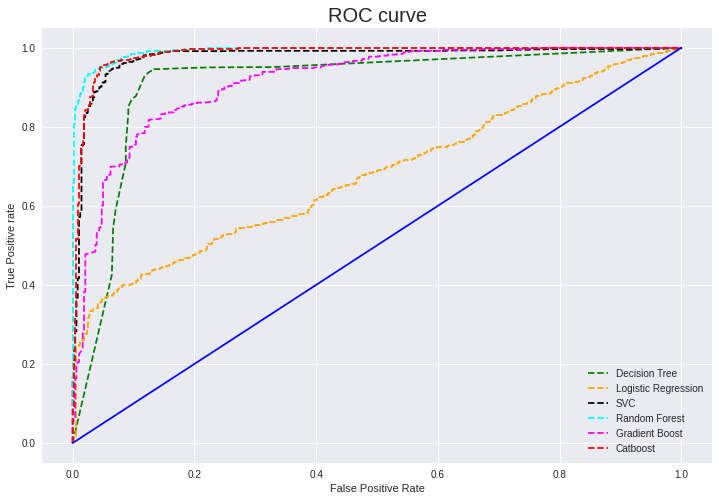

In [82]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='SVC')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='Gradient Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Catboost')
plt.plot(p_fpr, p_tpr, color='blue')




# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import classification_report



